In [13]:
import data_loader as dl

# указание пути к CSV-файлу
file_path = '/Users/lubovsoldatenko/DataspellProjects/datascience/HW2/data/water_potability.csv'

# загрузка данных
loader = dl.LoadData()
df = loader.load_csv(file_path)

In [14]:
# просмотр данных
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
# информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [16]:
# базовая статистика
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [17]:
from HW2.data_analyzer import MissingValuesHandler

# Создаем объект обработчика
handler = MissingValuesHandler(df)

# Подсчет пропущенных значений
handler.count_missing_values()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
# Отчет о пропущенных данных
handler.missing_values_report()


 Отчет о пропущенных значениях:
                 Missing Values  Missing Percentage
ph                          491           14.987790
Hardness                      0            0.000000
Solids                        0            0.000000
Chloramines                   0            0.000000
Sulfate                     781           23.840049
Conductivity                  0            0.000000
Organic_carbon                0            0.000000
Trihalomethanes             162            4.945055
Turbidity                     0            0.000000
Potability                    0            0.000000


In [19]:
# Заполняем пропущенные значения
handler.fill_missing_values()


 Пропущенные значения заполнены (числовые — медианой, строковые — модой).


In [20]:
# Удаляем строки с пропущенными значениями (если они остались)
handler.drop_missing_values()


 Удалено 0 строк с пропущенными значениями.


In [21]:
# Проверяем результат
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

График сохранен в plots/histogram_Sulfate.png


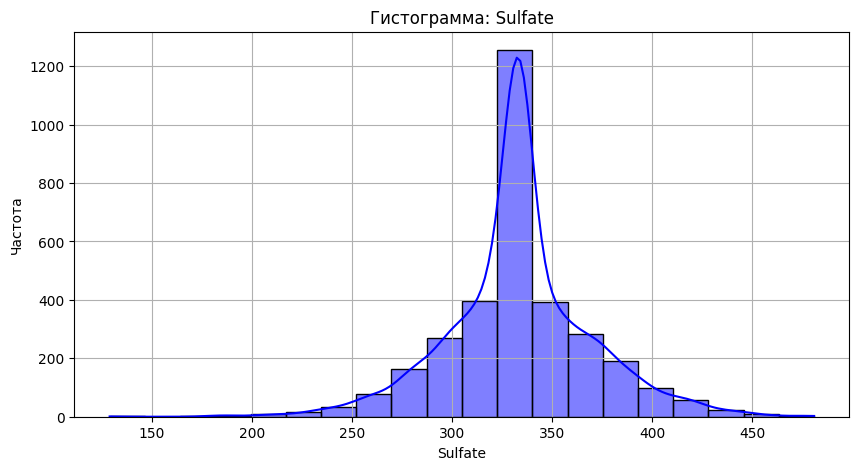

In [22]:
from HW2.data_visualizer import DataVisualizer

# Создаем объект визуализатора
visualizer = DataVisualizer(df)

#  Построение гистограммы
visualizer.plot_histogram(column='Sulfate', bins=20, color='blue', save=True)

График сохранен в plots/line_chart_ph_vs_Hardness.png


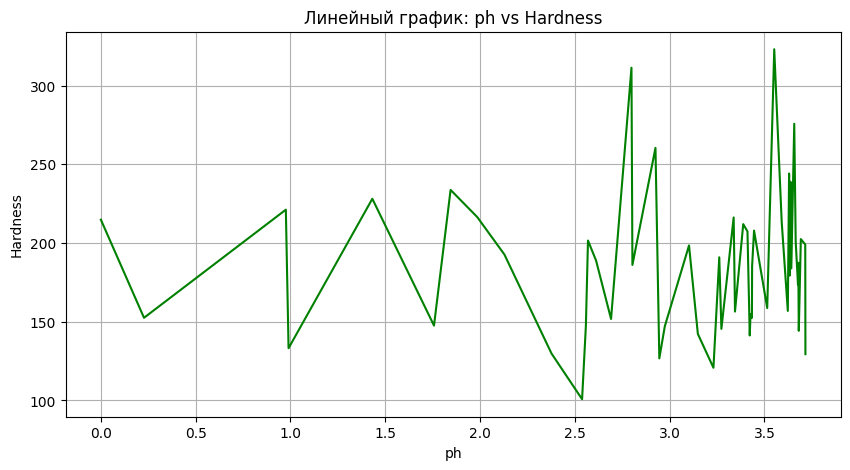

In [23]:
# Строим линейный график с ограничением на 50 точек
visualizer.plot_line_chart(x_column='ph', y_column='Hardness', color='green', save=True, limit=50, markers=False)


График сохранен в plots/scatter_ph_vs_Hardness.png


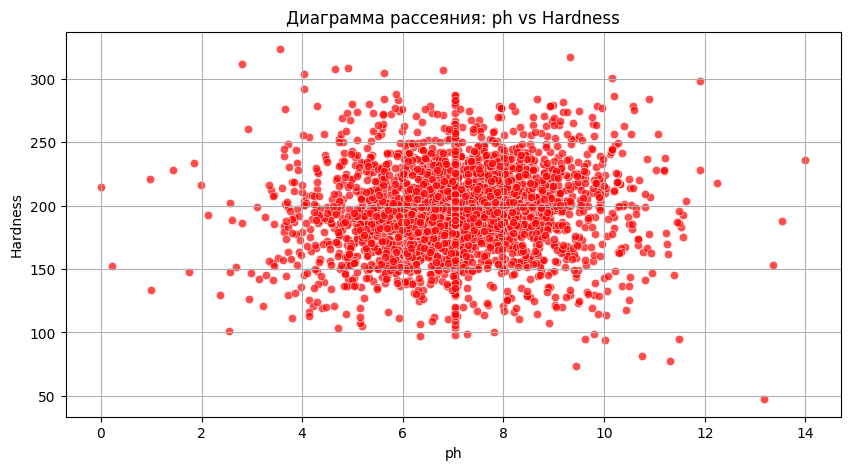

In [24]:
#  Построение диаграммы рассеяния
visualizer.plot_scatter(x_column='ph', y_column='Hardness', color='red', save=True)
